# House Price Prediction

Lets import some basic libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

The data is saved as "kc_house_data" in the directory

In [80]:
df=pd.read_csv('kc_house_data.csv')

In [81]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7.0,1180.0,0,1955,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7.0,2170.0,400,1951,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6.0,770.0,0,1933,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7.0,1050.0,910,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8.0,1680.0,0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


Lets drop columns like 'id' and 'data' as they are not useful in out analysis

In [82]:
df.drop(['id','date','zipcode'],axis=1,inplace=True)

Describe to get a overview about out data

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.521000e+04,25210.000000,25210.000000,25210.000000,2.521000e+04,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25210.000000,25209.000000,25209.000000,25209.000000,25209.000000,25209.000000,25208.000000
mean,5.450859e+05,3.376349,2.204988,2100.280167,1.464606e+04,1.537842,0.086632,0.228441,7.270131,7.756540,1815.978651,284.063784,1973.759580,83.935499,98073.952149,47.553190,-122.156189,1996.525844,12405.425897
std,3.691753e+05,0.927664,8.336203,930.714978,4.067314e+04,0.556584,12.590262,0.757247,617.387496,8.352231,843.091845,437.840171,42.276947,730.748542,619.696916,1.078199,9.021602,695.942088,27273.520542
min,0.000000e+00,0.000000,0.000000,7.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,-122.206000,0.000000,0.000000,0.000000,47.726700,-122.226000,-122.519000,399.000000,651.000000
25%,3.250000e+05,3.000000,1.750000,1430.000000,4.947000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1953.000000,0.000000,98033.000000,47.474100,-122.329000,1490.000000,5000.000000
50%,4.540000e+05,3.000000,2.250000,1930.000000,7.410000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1590.000000,0.000000,1978.000000,0.000000,98065.000000,47.570900,-122.230000,1850.000000,7480.000000
75%,6.500000e+05,4.000000,2.500000,2580.000000,1.037500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2270.000000,530.000000,2002.000000,0.000000,98117.000000,47.677000,-122.123000,2380.000000,9929.250000
max,7.700000e+06,33.000000,1320.000000,13540.000000,1.651359e+06,3.500000,1999.000000,4.000000,98030.000000,1320.000000,9410.000000,4820.000000,6259.000000,98034.000000,98199.000000,47.777600,1310.000000,10500.000000,871200.000000


In [83]:
df.shape

(25210, 18)

Check if we have any null data that could be an hurdle on our way

In [84]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     1
lat              1
long             1
sqft_living15    1
sqft_lot15       2
dtype: int64

As we can see we have some null entry.

Lets handle our null entries by replacing them using the mean of their columns

In [85]:
avg_renovated=df['yr_renovated'].mean()
print(f'Avg_yr_renovated = {avg_renovated}')
df['yr_renovated']=df['yr_renovated'].fillna(avg_renovated)

Avg_yr_renovated = 83.93549922646673


In [86]:
df['lat']=df['lat'].fillna(df['lat'].mean())
df['long']=df['long'].fillna(df['long'].mean())

In [88]:
avg_sqft_living15=df['sqft_living15'].mean()
print(f'Avg_sqft_living15 = {avg_sqft_living15}')
df['sqft_living15']=df['sqft_living15'].fillna(avg_sqft_living15)

Avg_sqft_living15 = 1996.525843944623


In [89]:
avg_sqft_lot15=df['sqft_lot15'].mean()
print(f'Avg_sqft_lot15 = {avg_sqft_lot15}')
df['sqft_lot15']=df['sqft_lot15'].fillna(avg_sqft_lot15)

Avg_sqft_lot15 = 12405.42589654078


In [91]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Now we don't have any null entries, we can begin with our visualization of our data


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25210 entries, 0 to 25209
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          25210 non-null  float64
 1   bedrooms       25210 non-null  float64
 2   bathrooms      25210 non-null  float64
 3   sqft_living    25210 non-null  int64  
 4   sqft_lot       25210 non-null  int64  
 5   floors         25210 non-null  float64
 6   waterfront     25210 non-null  int64  
 7   view           25210 non-null  int64  
 8   condition      25210 non-null  int64  
 9   grade          25210 non-null  float64
 10  sqft_above     25210 non-null  float64
 11  sqft_basement  25210 non-null  int64  
 12  yr_built       25210 non-null  int64  
 13  yr_renovated   25210 non-null  float64
 14  lat            25210 non-null  float64
 15  long           25210 non-null  float64
 16  sqft_living15  25210 non-null  float64
 17  sqft_lot15     25210 non-null  float64
dtypes: flo

Checking if there are any datatype errors so that we can typecast them into their correct format

In [93]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade            float64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

We will now get with the finding the co-relation of our columns with other columns

<Axes: >

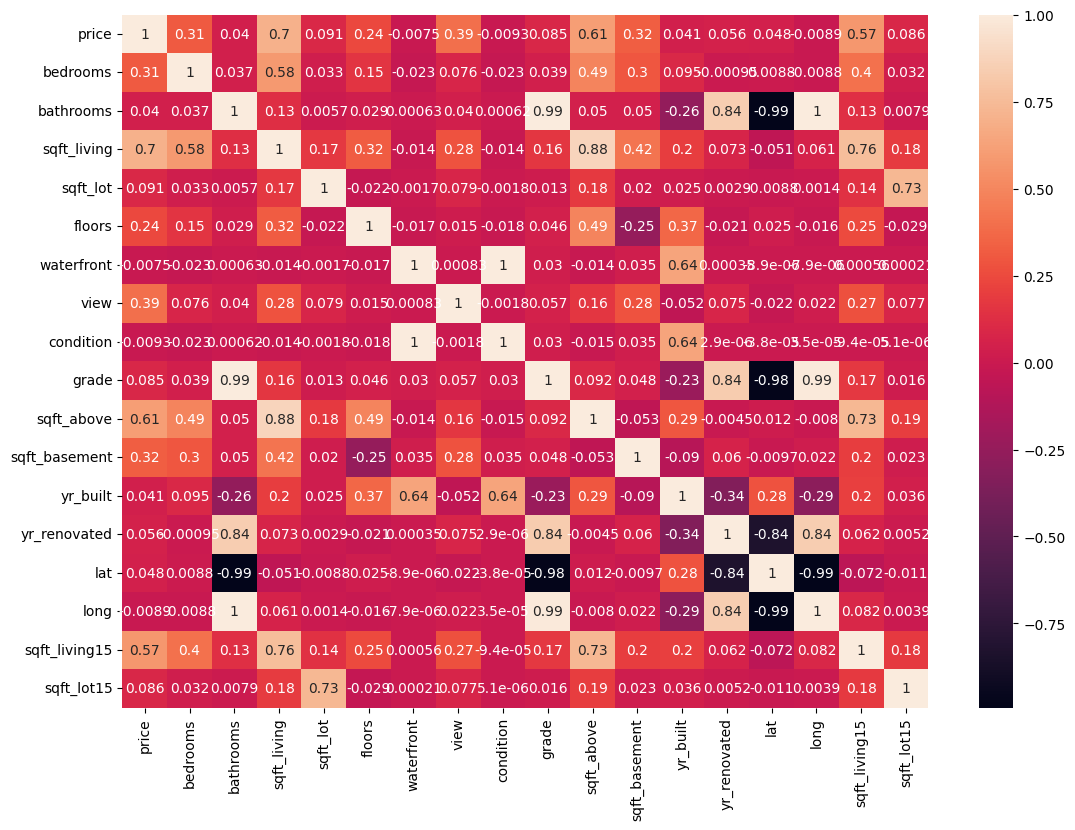

In [94]:
plt.figure(figsize=(13,9))
sns.heatmap(df.corr(),annot=True)

we can see, 'sqft_living','sqft_above' have the highest co-relations with our target column i.e. 'price'

In [95]:
df[['sqft_living','sqft_above','price']].corr()

,sqft_living,sqft_above,price
sqft_living,1.000000,0.880315,0.700779
sqft_above,0.880315,1.000000,0.606187
price,0.700779,0.606187,1.000000


Regression Plot is the  combination of ScatterPlot and a line which is lenear to all the scattered points

Let's get the regression plot of our independent column 'sqft_living' and our target column 'price'

<Axes: xlabel='price', ylabel='sqft_living'>

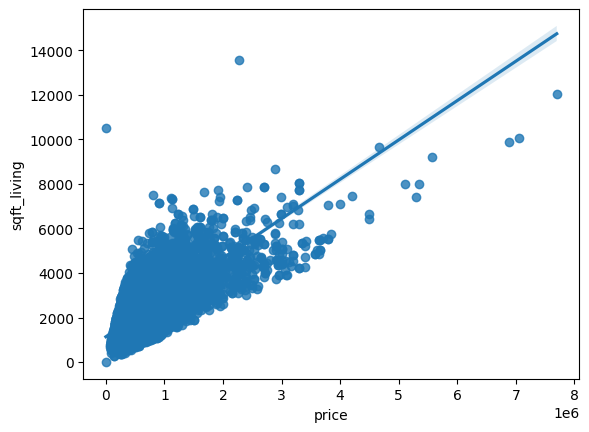

In [96]:
sns.regplot(x=df.price,y=df.sqft_living)

Regression plot of 'sqft_above' and 'price'

<Axes: xlabel='price', ylabel='sqft_above'>

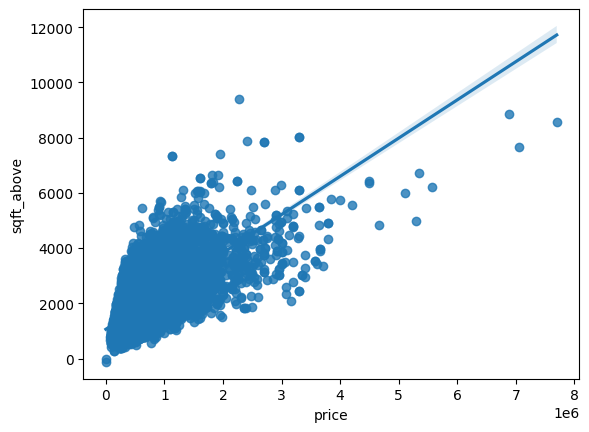

In [97]:
sns.regplot(x=df.price,y=df.sqft_above)

##Model Building


Throught this we will try multiple models and find the best suiting to ours.



First let us try Multi Linear Regression model which takes multiple columns as input for our prediction.

In [98]:
from sklearn.model_selection import train_test_split

Creating X data set with all the columns excluding the price

In [99]:
X=df.drop('price',axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3.0,1.00,1180,5650,1.0,0,0,3,7.0,1180.0,0,1955,0.0,47.5112,-122.257,1340.0,5650.0
1,3.0,2.25,2570,7242,2.0,0,0,3,7.0,2170.0,400,1951,1991.0,47.7210,-122.319,1690.0,7639.0
2,2.0,1.00,770,10000,1.0,0,0,3,6.0,770.0,0,1933,0.0,47.7379,-122.233,2720.0,8062.0
3,4.0,3.00,1960,5000,1.0,0,0,5,7.0,1050.0,910,1965,0.0,47.5208,-122.393,1360.0,5000.0
4,3.0,2.00,1680,8080,1.0,0,0,3,8.0,1680.0,0,1987,0.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25205,3.0,2.50,1530,1131,3.0,0,0,3,8.0,1530.0,0,2009,0.0,47.6993,-122.346,1530.0,1509.0
25206,4.0,2.50,2310,5813,2.0,0,0,3,8.0,2310.0,0,2014,0.0,47.5107,-122.362,1830.0,7200.0
25207,2.0,0.75,1020,1350,2.0,0,0,3,7.0,1020.0,0,2009,0.0,47.5944,-122.299,1020.0,2007.0
25208,3.0,2.50,1600,2388,2.0,0,0,3,8.0,1600.0,0,2004,0.0,47.5345,-122.069,1410.0,1287.0


Y will be the target column

In [101]:
Y=df['price']
Y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [102]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [103]:
print(f"Shape of x_train = {x_train.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of x_test = {x_test.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of x_train = (20168, 17)
Shape of y_train = (20168,)
Shape of x_test = (5042, 17)
Shape of y_test = (5042,)


##Model Building

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lr1=LinearRegression()
lr1

LinearRegression()

In [106]:
lr1.fit(x_train,y_train)

LinearRegression()

In [107]:
predict1=lr1.predict(x_test)
predict1[:5]

array([ 423883.22845877,  439834.03077012,  164366.17260268,
        582527.18835115, 1279756.6783564 ])

In [108]:
print(f"Y_Test samples : {y_test[:5]} ")
print(f"Predicted samples : {predict1[:5]} ")

Y_Test samples : 18174     505000.0
4890      255000.0
22192     202000.0
8813      580000.0
23919    1240000.0
Name: price, dtype: float64 
Predicted samples : [ 423883.22845877  439834.03077012  164366.17260268  582527.18835115
 1279756.6783564 ] 


In [211]:
score_MultiLR=r2_score(y_test,predict1)

In [109]:
from sklearn.metrics import r2_score
print(f"Score : {r2_score(y_test,predict1)}")

Score : 0.6897814849625741


Scatter plot that shows us the relation between our features and our target

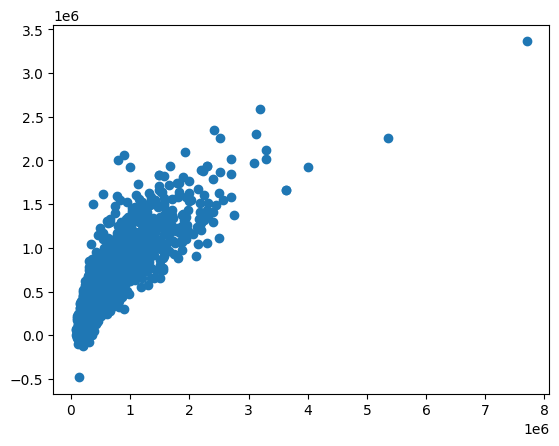

In [110]:
plt.scatter(y_test,predict1)

As we can see out Multi Regression model dosen't have satisfactory result

So, let us try with 'sqft_living' which has the highest co-relation with our target

In [127]:
X2=df['sqft_living']
X2=X2.values
X2=X2.reshape(-1,1)
print(X2)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


In [131]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,Y,test_size=0.20,random_state=0)

In [112]:
lr2=LinearRegression()
lr2

LinearRegression()

In [132]:
lr2.fit(x2_train,y2_train)

LinearRegression()

In [202]:
predict2=lr2.predict(x2_test)

In [210]:
score_SingleLR=r2_score(y2_test,predict2)

In [203]:
print(f'Score of single linearRegression : {r2_score(y2_test,predict2)}')

Score of single linearRegression : 0.5172623771435145


<Axes: ylabel='price'>

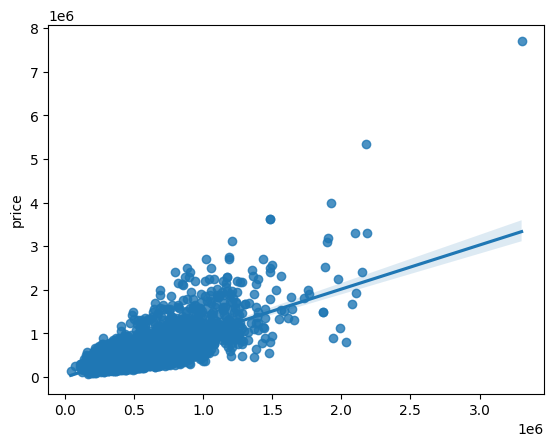

In [204]:
sns.regplot(x=predict2,y=y2_test)

Single Linear Regression too don't have a promising accuracy.

Hence let us try with the pipeline model

In [139]:
!pip install scikit-learn-pipeline-utils



In [177]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [145]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [147]:
pipeline=Pipeline(Input)
pipeline.fit(df.drop('price',axis=1),df['price'])



0.8132017785476092

In [152]:
predict3=pipeline.predict(x_test)

In [209]:
score_pipelining=pipeline.score(df.drop('price',axis=1),df['price'])

In [153]:
print(f"Pipelining Score : {pipeline.score(df.drop('price',axis=1),df['price'])}")

Pipelining Score : 0.8132017785476092


In [163]:
print(predict3[:5])
print(y_test[:5])

[ 439088.27453896  402718.64879428  279304.67970952  504451.10649542
 1485701.13297573]
18174     505000.0
4890      255000.0
22192     202000.0
8813      580000.0
23919    1240000.0
Name: price, dtype: float64


<Axes: ylabel='price'>

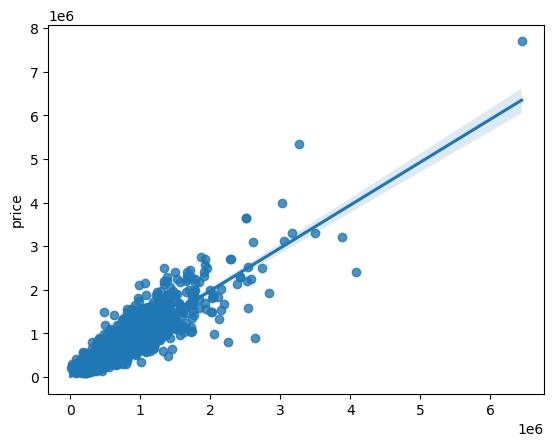

In [176]:
sns.regplot(x=predict3,y=y_test)

Let us Compare our results to select the best model for our model

Text(0.5, 1.0, 'Accuracy Comparision')

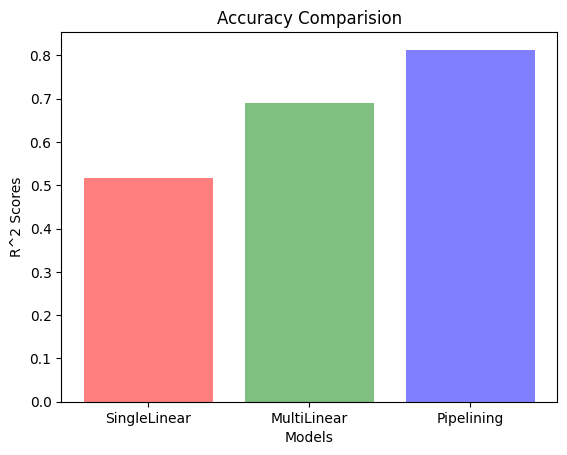

In [218]:
models=['SingleLinear','MultiLinear','Pipelining']
scores=[score_SingleLR,score_MultiLR,score_pipelining]

plt.bar(models,scores,color=['r','g','b'],alpha=0.5)
plt.xlabel('Models')
plt.ylabel('R^2 Scores')
plt.title("Accuracy Comparision")

Pipelining model seems to have better accuracy than the other two models.

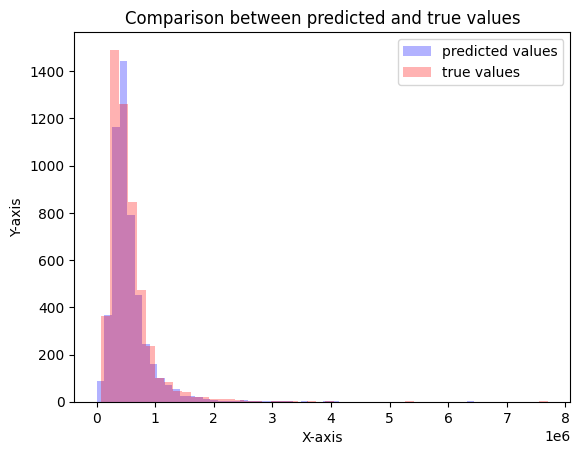

In [217]:
plt.hist(predict3, bins=50, label= 'predicted values', color= 'blue', alpha=0.3)
plt.hist(y_test,bins=50, label= 'true values', color='red', alpha=0.3)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Comparison between predicted and true values')
plt.legend()

The above graph is a histogram of both Predicted and true values of our model.

As we can see most of the True value part is covered into the prediced values we can say that it can be a better model for our task.